In [1]:
from IPython.display import HTML, Image
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

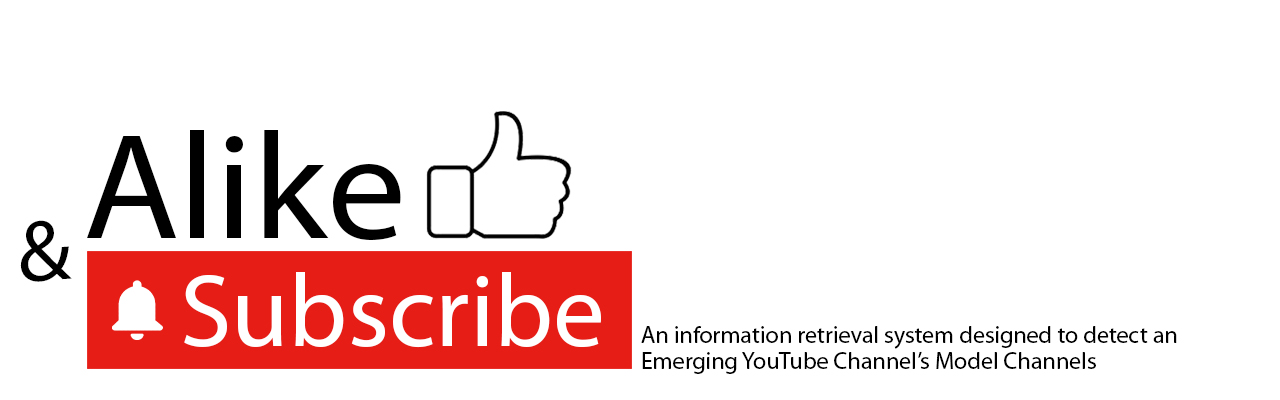

In [3]:
image_path = 'Banner1.jpg'

Image(filename=image_path)

In [4]:
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [5]:
def get_channel_info(channel_id):
    """
    Retrieves information about a YouTube channel.

    Parameters:
    channel_id (str): The YouTube channel ID.
    api_key (str): The API key for accessing YouTube Data API.

    Returns:
    tuple: A tuple containing raw channel data and structured channel
    information.

    Raises:
    ValueError: If the response from the API is not successful.
    """

    if not channel_id or not api_key:
        raise ValueError("Channel ID and API key are required")

    channel_ep = 'https://www.googleapis.com/youtube/v3/channels'
    params = {
        'part': ('id,snippet,statistics,contentDetails,topicDetails,'
                 'brandingSettings'),
        'id': channel_id,
        'key': api_key
    }

    try:
        response = requests.get(channel_ep, params=params)
        if response.status_code != 200:
            raise ValueError(f"API request failed with status code"
                             f" {response.status_code}")

        content = response.json()
        item = content.get('items', [{}])[0]

        title = item.get('snippet', {}).get('title', 'Unknown')
        desc = item.get('snippet', {}).get('description', 'No description')
        country = item.get('snippet', {}).get('country', 'None')
        topic_categ = item.get('topicDetails', {}).get('topicCategories', [])
        view_count = item.get('statistics', {}).get('viewCount', '0')
        sub_count = item.get('statistics', {}).get('subscriberCount', '0')
        vid_count = item.get('statistics', {}).get('videoCount', '0')
        keywords = (item.get('brandingSettings', {}).get('channel', {})
                    .get('keywords', 'None'))

        needed_info = {
            'title': title,
            'description': desc,
            'country': country,
            'topic_categories': topic_categ,
            'view_count': view_count,
            'subscriber_count': sub_count,
            'video_count': vid_count,
            'keywords': keywords
        }

        return item, needed_info

    except requests.RequestException as e:
        logging.error(f"Network error occurred: {e}")
        raise
    except ValueError as e:
        logging.error(f"API response error: {e}")
        raise
    except Exception as e:
        logging.error(f"Unexpected error occurred: {e}")
        raise

In [6]:
# Define a function to safely evaluate the string representation of a list
def safe_eval_list(string):
    """
    Safely evaluate the string representation of a list.

    This function takes a string as input and attempts to evaluate it as a
    list using the `eval` function. If the evaluation succeeds, it returns
    the resulting list; otherwise, it returns an empty list.

    Parameters
    ----------
    string : str
        The string representation of a list to be evaluated.

    Returns
    -------
    list
        The evaluated list if successful, or an empty list if evaluation fails.
    """
    try:
        # Evaluate the string as a list
        return eval(string)
    except:
        # If evaluation fails, return an empty list
        return []

# Alike and Subscribe
#### A recommender system for emerging youtube channels

## Abstract

Making it ‘big’ on YouTube is not as easy as it seems. In a vast and competitive digital landscape, any creator wanting to succeed on the platform faces the complex problem of beating the algorithm. The core issue for these “Emerging Channels” is finding successful strategies that align with the platform’s algorithm. To address this challenge, the group developed an information retrieval system that utilizes information from YouTube API. This system aggregates channel data and employs text analysis to match Emerging Channels with those of successful “Model Channels.” 

Through the methods used in this project, an IR system that gave relevant output was successfully created. The IR performed well, with respect to evaluation metrics, on channels that are represented in the dataset, but expectedly performed poorly in those that were not. The group provided recommendations that aimed to address the limitations of the study.

## Problem Statement

Emerging Channels on YouTube face a significant challenge in gaining visibility and traction in a platform dominated by complex and confidential algorithms. While the exact workings of these algorithms remain known only to Google, one viable strategy for smaller channels is to analyze and emulate successful practices of established Model Channels. 
Therefore, this study proposes the creation of an information retrieval system designed to recommend similar Model Channels based on the characteristics of a given Emerging Channel, offering a strategic approach to growth and visibility in the competitive YouTube ecosystem.


## Motivation
In the current YouTube ecosystem, budding creators encounter obstacles due to the platform's control over content dissemination and algorithmic biases. This control not only limits the diversity of content visible to users but also stifles the emergence of fresh, innovative ideas. The dominance of a few prominent creators shapes popular trends, overshadowing new perspectives and diminishing the opportunity for diverse content to thrive. This creates elevated entry barriers for new creators, hindering the evolution of content quality and diversity.

The ideal scenario for YouTube would pivot on an equitable and open environment where content quality and relevance are paramount, granting equal visibility to all creators, regardless of their size. While a complete overhaul of YouTube's algorithmic approach may be implausible in the near term, the strategic goal shifts to transforming this algorithm from a hurdle into a leveraged asset. This motivation underscores the necessity of our proposed solution — an information retrieval system designed to empower emerging channels by aligning them with successful models, thereby democratizing success and fostering a more inclusive and dynamic YouTube landscape.


## Data Source

### List of Top YouTubers
Given the limitations in YouTube API, a separate website (https://vidiq.com/youtube-stats/top/500/) with information on the top 250 channels based on the subscriber count was scraped.

In [7]:
top_250_df = pd.read_csv('Top_250_VidIQ.csv')
print("Figure 1.1. First 5 and Last 5 of the Top 250 YouTube"
      " Channels")
display(top_250_df)

Figure 1.1. First 5 and Last 5 of the Top 250 YouTube Channels


,Rank,Channel,Videos,Subscribers,Views
0,#1,T-Series,19.81K,253M,237.8B
1,#2,MrBeast,767,210M,36.87B
2,#3,Cocomelon - Nursery Rhymes,1.03K,167M,170.37B
3,#4,SET India,121.48K,165M,153.88B
4,#5,✿ Kids Diana Show,1.14K,115M,96.9B
...,...,...,...,...,...
245,#246,Chris Brown,38,25.7M,16.02B
246,#247,Anuel AA,148,25.7M,15.68B
247,#248,Rans Entertainment,3.92K,25.7M,6.6B
248,#249,TaylorSwiftVEVO,307,25.6M,26.82B


### Corpus
The proposed system uses YouTube Data API (https://developers.google.com/youtube/v3) to call each channel found in the Top 250 list. These 250 channels will serve as the Information Retrieval system’s corpus when looking for the Model channel. 

### Exemplar 
Similarly, the system will use YouTube Data API to retrieve details regarding the exemplar YouTube channel. The exemplar is any existing YouTube channel determined by the user. 


In [8]:
sample_exemplar = pd.DataFrame([get_channel_info('UClxGlpO6TzyJcW7gPCJe94g')[1]])
print("Figure 1.2. Raw data for the sample Exemplar Channel")
display(sample_exemplar)

Figure 1.2. Raw data for the sample Exemplar Channel


,title,description,country,topic_categories,view_count,subscriber_count,video_count,keywords
0,GLOCO,Grumpy Weab Gamer Fisherman. \nFor Business I...,US,[https://en.wikipedia.org/wiki/Action-adventur...,174119296,1230000,2327,GLOCO GLOCOgaming Gameplay anime otaku horror ...


### Metrics to Be Retrieved 
The API is used to call several channel details which will be used to create a profile of each channel in order to distinguish them from other channels and compare each channel in the corpus to the exemplar. 

<ol>
    <li>title: string 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;The name of the YouTube channel.
    </li>
    <li>country: string 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;The country where the channel is based. 
    </li>
    <li>topic_categories: list 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;A list of Wikipedia URLs that describe the channel's content.
    </li>
    <li>view_count: int 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;The total number of views of all videos the channel has uploaded. 
    </li>
    <li>subscriber_count: int 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;The total number of users subscribed to the channel. 
    </li>
    <li>video_count: int 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;The total number of videos a channel has uploaded. 
    </li>
    <li>keywords: list 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Terms that give YouTube information and context about the channel, such as the type of content produced, and who the channel’s target audience is. Keywords are determined and set by the channel owner.
    </li>
</ol>


### Archetypes 
The group created archetypes to classify each channel based on their own content (see below). These archetypes will be used during Data Exploration to further give context to the corpus. Moreover, these categories will also serve as the primary metric for Precision and Recall later in the report.

<ul>
    <li>Corporate / Non-Youtuber Account: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp; For large corporations, VEVO accounts, and similar entities. For the purposes of the study, YouTube channels that are labeled as Corporate should not be considered as viable Model channels. 
    </li>
    <li>Variety / General Entertainment:
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Channels like MrBeast, which cover a broad range of content.
    </li>
    <li>Kids / Family: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Channels primarily focused on content for children or family-oriented content.
    </li>
    <li>Gaming: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Channels primarily focused on video games and gaming culture. 
    </li>
    <li>Vlogs / Lifestyle: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Personal vloggers and lifestyle content creators. 
    </li>
    <li>Education / Science: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Channels that primarily focus on educational content, science, and technology. 
    </li>
    <li>Music / Performance: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Musicians, singers, and performance arts channels. 
    </li>
    <li>Comedy / Humor: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Channels that focus on comedy skits, stand-up, or humorous content. 
    </li>
    <li>Beauty / Fashion: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Channels focusing on beauty, makeup, and fashion. 
    </li>
    <li>Sports / Fitness: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Content related to sports, fitness, and physical activities. 
    </li>
    <li>Cooking / Food: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Channels dedicated to cooking, food reviews, and culinary arts. 
    </li>
    <li>Travel / Adventure: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Channels focusing on travel, adventure, and exploration. 
    </li>
    <li>Tech / Reviews: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Channels that review technology products or discuss tech news. 
    </li>
    <li>DIY / Crafts: 
        <h5>&nbsp;&nbsp;&nbsp;&nbsp;Content focusing on do-it-yourself projects, crafts, and handiwork.
    </li>
</ul>

Note: It will be observed later that not all categories will be used in the top 250 list. Nonetheless, the classifications are retained for future scalability of this project. 


In [9]:
labels_df = pd.read_csv('Lab2_Labels.csv')
print("Figure 1.3. Illustrates the head and tail of the group's manual labeling"
      " efforts of each youtube channel")
display(labels_df)

Figure 1.3. Illustrates the head and tail of the group's manual labeling efforts of each youtube channel


,Channel_Name,Channel_Id,Description,Independent,Archetypes
0,T-Series,UCq-Fj5jknLsUf-MWSy4_brA,T-Series is a corporate YouTube channel and on...,No,Corporate / Non-Youtuber
1,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast is an independent YouTuber known for h...,Yes,Variety / General Entertainment
2,Cocomelon - Nursery Rhymes,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery Rhymes is a corporate YouT...,No,Corporate / Non-Youtuber
3,SET India,UCpEhnqL0y41EpW2TvWAHD7Q,SET India is a corporate YouTube channel repre...,No,Corporate / Non-Youtuber
4,✿ Kids Diana Show,UCk8GzjMOrta8yxDcKfylJYw,Kids Diana Show is an independent YouTube chan...,Yes,Kids / Family
...,...,...,...,...,...
245,Chris Brown,UCm1dsgJNnhaLkY3uAdqN4mA,Chris Brown's official YouTube channel is a co...,No,Corporate / Non-Youtuber
246,Anuel AA,UCRI7hheejBbWS6etTNwMT0g,Anuel AA's official YouTube channel is a corpo...,No,Corporate / Non-Youtuber
247,Rans Entertainment,UCvA9_f5Lwk-poMynabtrZPg,Rans Entertainment appears to be an independen...,Yes,Vlogs / Lifestyle
248,TaylorSwiftVEVO,UCANLZYMidaCbLQFWXBC95Jg,TaylorSwiftVEVO is a corporate YouTube channel...,No,Corporate / Non-Youtuber


## Methodology

### Overview

Figure 2.1. visually represents the processes used from Data Acquisition to generating Recommendations.

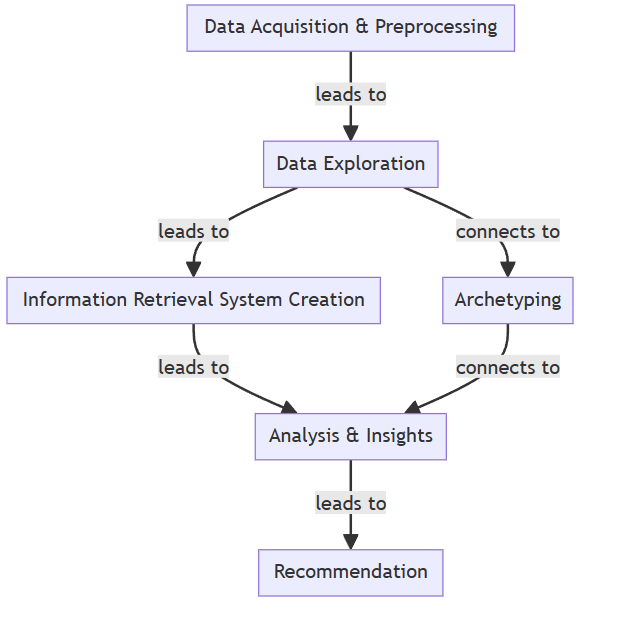

In [10]:
image_path = 'Meth_fig.png'

Image(filename=image_path)



### Details
#### Data Acquisition
As discussed, the list of top 250 channels was web scraped from this url. Using this list, the group manually looked up the unique IDs for each channel. The function ‘get_channel_info’ was created to pull relevant data from YouTube API using the channel IDs. Note, pulling data from the API is possible using the channel names, but using unique IDs ensured the right channel was selected. The raw database is shown below.

In [11]:
raw_data = pd.read_csv('Lab2_DataBase.csv')
print("Figure 2.2. First 5 entries in the raw dataset")
display(raw_data.head())

Figure 2.2. First 5 entries in the raw dataset


,title,description,country,topic_categories,view_count,subscriber_count,video_count,keywords
0,T-Series,"""Music can change the world"". T-Series is Indi...",IN,"['https://en.wikipedia.org/wiki/Music', 'https...",238030852574,253000000,19820,"""tseries tseries"" t-series ""tseries songs"" ""di..."
1,MrBeast,SUBSCRIBE FOR A COOKIE!\nAccomplishments:\n- R...,US,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,36996755250,211000000,767,mrbeast6000 beast mrbeast Mr.Beast mr
2,Cocomelon - Nursery Rhymes,"At CoComelon, our primary goal has always been...",US,['https://en.wikipedia.org/wiki/Entertainment'...,170365245506,167000000,1036,"""nursery rhymes"" ""baby songs"" ""nursery songs"" ..."
3,SET India,Sony Entertainment Television is one of the le...,IN,['https://en.wikipedia.org/wiki/Television_pro...,153953696545,165000000,121686,"""SET India"" ""Sony Entertainment Television"" ""S..."
4,✿ Kids Diana Show,"Welcome to Diana and Roma world - where Diana,...",US,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,96980699954,115000000,1136,"""diana and roma"" diana ""roma and diana"" ""kids ..."


#### Preprocessing & Corpus Creation
No duplicates were found across the entire dataset. Empty cells were identified in the ‘country’, ‘topic_categories’, and ‘keywords.’  To address these, the .fillna method was used to allow these cells to return None. These values were kept to retain potential insights on the platform’s algorithm. 

The group used Onehot encoder to properly label values in the ‘country’ column. Given it was a list, the ‘topic_categories’ needed to be split first and flattened using string methods. The columns  ‘keywords’, which is a list, were tokenized to create the Bag of Words using the custom function ‘custom_tokenizer’ and TF-IDF vectorizer to be used for information retrieval

The values for the numerical columns ‘view_count’, ‘subscriber_count’, and ‘video_count’ were normalized with their max values. These normalized values were then used to create new columns ‘view_subscriber_ratio’ and ‘view_video_ratio’, to be used in the final dataframe. The last step is to create the Corpus by concatenating the ratios, BoW, country, and the encoded topic_categories.


In [12]:
print("Figure 2.3. Statistical Summary of the Raw Data for the numerical columns")
raw_data.describe()

Figure 2.3. Statistical Summary of the Raw Data for the numerical columns


,view_count,subscriber_count,video_count
count,2.500000e+02,2.500000e+02,250.000000
mean,2.342637e+10,4.196040e+07,15933.524000
std,2.438943e+10,2.633223e+07,47417.288333
min,2.394507e+09,2.550000e+07,15.000000
25%,1.154034e+10,2.910000e+07,523.000000
50%,1.763856e+10,3.415000e+07,1515.500000
75%,2.705113e+10,4.297500e+07,5246.000000
max,2.380309e+11,2.530000e+08,331142.000000


In [13]:
min_view_count = raw_data['view_count'].min()
max_view_count = raw_data['view_count'].max()

formatted_min_view_count = '{:,}'.format(min_view_count)
formatted_max_view_count = '{:,}'.format(max_view_count)


min_subscriber_count = raw_data['subscriber_count'].min()
max_subscriber_count = raw_data['subscriber_count'].max()

formatted_min_subscriber_count = '{:,}'.format(min_subscriber_count)
formatted_max_subscriber_count = '{:,}'.format(max_subscriber_count)


min_video_count = raw_data['video_count'].min()
max_video_count = raw_data['video_count'].max()

formatted_min_video_count = '{:,}'.format(min_video_count)
formatted_max_video_count = '{:,}'.format(max_video_count)

print(f"Note that the range of the values for the column 'view_count' is"
      f"{formatted_min_view_count} - {formatted_max_view_count}")
print(f"Note that the range of the values for the column 'subcscriber_count'"
      f" is {formatted_min_subscriber_count} - "
      f"{formatted_max_subscriber_count}")
print(f"Note that the range of the values for the column 'video_count' is"
      f" {formatted_min_video_count} - {formatted_max_video_count}")

Note that the range of the values for the column 'view_count' is2,394,507,071 - 238,030,852,574
Note that the range of the values for the column 'subcscriber_count' is 25,500,000 - 253,000,000
Note that the range of the values for the column 'video_count' is 15 - 331,142


Seeing that the continuous values scale higher than most of the other features, they are normalized so as not to overemphasize the value of the feature. 

In [14]:
# Corpus Creation

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


# Redefining the custom tokenizer
def custom_tokenizer(text):
    """
    Redefine the custom tokenizer.

    This function takes a text input and tokenizes it based on the provided
    pattern. The pattern matches phrases within double quotes and single words
    separated by spaces.
    
    Parameters
    ----------
    text : str
        The input text to be tokenized.

    Returns
    -------
    list of str
        A list of tokens extracted from the input text.
    """
    # Matches phrases within quotes and single words separated by spaces
    pattern = r'"([^"]+)"|(\w+)'
    tokens = re.findall(pattern, text)
    # Flatten the list of tuples and filter out empty strings
    return [token for pair in tokens for token in pair if token]

# Load the CSV file
lab2_db = pd.read_csv('Lab2_DataBase.csv')
raw_data = lab2_db.copy()

# Try to normalize the three numerical columns with their max values
lab2_db['view_count'] = lab2_db['view_count'] / raw_data['view_count'].max()
lab2_db['subscriber_count'] = lab2_db['subscriber_count'] / raw_data['subscriber_count'].max()
lab2_db['video_count'] = lab2_db['video_count'] / raw_data['video_count'].max()

# Fill missing values with an empty string
lab2_db['keywords'].fillna('', inplace=True)
lab2_db['topic_categories'].fillna('', inplace=True)

# One-Hot Encode the 'country' Column
onehot_encoder = OneHotEncoder(sparse_output=False)
country_encoded = onehot_encoder.fit_transform(lab2_db['country'].values.reshape(-1, 1))
country_encoded_df = pd.DataFrame(country_encoded, columns=onehot_encoder.get_feature_names_out(['country']))

# Process 'topic_categories' Column (split, flatten, and one-hot encode)
topic_categories_flat = lab2_db['topic_categories'].str.replace(r'[\[\]]', '', regex=True).str.split(',', expand=True).apply(lambda x: x.str.strip()).stack()
topic_categories_flat_encoded = pd.get_dummies(topic_categories_flat).groupby(level=0).sum()
topic_categories_flat_encoded.rename(columns={"": "topic_category_none"}, inplace=True)


# Create a Bag of Words using TF-IDF with the custom tokenizer for 'keywords' Column
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)
tfidf_bag_of_words = tfidf_vectorizer.fit_transform(lab2_db['keywords'])
tfidf_bag_of_words_df = pd.DataFrame(tfidf_bag_of_words.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Create Ratio Columns
lab2_db['view_subscriber_ratio'] = lab2_db['view_count'] / lab2_db['subscriber_count']
lab2_db['view_video_ratio'] = lab2_db['view_count'] / lab2_db['video_count']
# data.replace([np.inf, -np.inf], np.nan, inplace=True)
lab2_db.fillna(0, inplace=True)

# Concatenate all the created DataFrames along with the original data
data_trim = lab2_db[['title', 'view_subscriber_ratio', 'view_video_ratio']]
final_df1 = pd.concat([data_trim, country_encoded_df, topic_categories_flat_encoded, tfidf_bag_of_words_df], axis=1)


# Concatenate all the created DataFrames along with the original data
# Without  video_video_ratio
data_trim2 = lab2_db[['title', 'view_subscriber_ratio']]
final_df2 = pd.concat([data_trim2, country_encoded_df, topic_categories_flat_encoded, tfidf_bag_of_words_df], axis=1)

corpus_df = final_df2.set_index('title')

In [15]:
display(corpus_df.head())
print("Figure 2.4. Preview of the Generated Corpus")

,view_subscriber_ratio,country_AE,country_AR,country_AU,country_BR,country_CA,country_CL,country_CO,country_DE,country_ES,...,천상지희,천상지희더그레이스,택연,투에이엠,투피엠,트랙스,틱톡김프로,페이,피프틴앤드,혜림
title,,,,,,,,,,,,,,,,,,,,,
T-Series,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MrBeast,0.186367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cocomelon - Nursery Rhymes,1.084306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SET India,0.991730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
✿ Kids Diana Show,0.896344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Figure 2.4. Preview of the Generated Corpus





#### Manual Labor / Archetype Assignment 
The group manually assigned archetypes for each channel/row. The process involved visiting each profile page and assessing which archetype best describes their channel based on their content.

These classifications were selected from the list of 14 discussed above. 

#### Information Retrieval
Another series of functions were created to conduct information retrieval. First, the ‘vectorize’ function is used to transform the exemplar, our Emerging Channel, to match the format of our corpus. Along the process of this project, a supplementary function, ‘get_exemplar’ was also created to match the datatypes of the exemplar to that of those found in the corpus.

After matching the exemplar, the custom function ‘lpnorm’ was created to the L_p-norm distance between vectors. More on this later.

Function ‘nearest_k’ is used to return the most similar Model Channels based on the calculations done by ‘lpnorm.’


In [16]:
# Code Block to vectorize new data

# For Build Mappings
index_token = {i: t for i, t in enumerate(corpus_df.columns)}
token_index = {t: i for i, t in enumerate(corpus_df.columns)}


# Function to Vectorize Data
def vectorize(new_data):
    vec = np.zeros(len(corpus_df.columns))

    # Fill missing values
    new_data['keywords'] = new_data.get('keywords', '')
    new_data['topic_categories'] = new_data.get('topic_categories', '')
    
    # Normalize the 3 numerical columns
    new_data['view_count'] = (new_data['view_count'] /
                              raw_data['view_count'].max())
    new_data['subscriber_count'] = (new_data['subscriber_count'] /
                                    lab2_db['subscriber_count'].max())
    new_data['video_count'] = (new_data['video_count'] /
                               lab2_db['video_count'].max())

    # Vectorize 'country'
    vec_country = pd.get_dummies(new_data, columns=['country'],
                                 dtype=int).iloc[:, -1:]

    # Vectorize 'topic_categories'
    topic_categories_flat = (new_data['topic_categories']
                             .str.replace(r'[\[\]]', '', regex=True)
                             .str.split(',', expand=True)
                             .apply(lambda x: x.str.strip()).stack())
    topic_categories_df = (pd.get_dummies(topic_categories_flat)
                           .groupby(level=0).sum())
    topic_categories_df.rename(columns={"": "topic_category_none"},
                               inplace=True)
    
    # Vectorize 'keywords'
    keywords_vector = tfidf_vectorizer.transform(new_data['keywords'])
    keywords_vector_df = pd.DataFrame(keywords_vector.toarray(),
                                      columns=(tfidf_vectorizer
                                               .get_feature_names_out()))

    # Create Ratio Columns
    new_data['view_subscriber_ratio'] = (new_data['view_count'] /
                                         new_data['subscriber_count'])
    new_data['view_video_ratio'] = (new_data['view_count'] /
                                    new_data['video_count'])
    new_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    new_data.fillna(0, inplace=True)

    new_data_trim = new_data[['view_subscriber_ratio', 'view_video_ratio']]
    vec_df = pd.concat([new_data_trim.reset_index(drop=True),
                        vec_country.reset_index(drop=True),
                        topic_categories_df.reset_index(drop=True),
                        keywords_vector_df.reset_index(drop=True)], axis=1)
    # vec_df = vec_df.loc[:, vec_df.any()]

    for k, v in vec_df.items():
        if k in token_index.keys():
            vec[token_index[k]] = v.iloc[0]
    return vec

In [17]:
def lpnorm(vec1, vec2, p=2):
    """Compute the L_p-norm distance between vec1 and vec2

    If `vec1` and `vec2` are same-sized matrices, an ndarray of the L_p-norm
    of corresponding rows will be returned instead.

    Parameters
    ----------
    vec1 : ndarray
        First vector
    vec2 : ndarray
        Second vector
    p : int or float, optional
        Order of L_p norm; the `p` in L_p norm

    Returns
    -------
    float
        L_p norm distance of `vec1` and `vec2`
    """
    d = np.power(np.abs(vec1 - vec2), p)
    d_sum = np.sum(d, axis=len(d.shape)-1) # equal weights distance
    return np.power(d_sum, 1/p)

In [18]:
def get_exemplar(channel_id):
    """Return the vectorized representation of a given channel_id"""
    raw, exemp = get_channel_info(channel_id)
    exemp_df = pd.DataFrame([exemp])
    exemp_df['view_count'] = exemp_df['view_count'].astype('float64')
    exemp_df['subscriber_count'] = exemp_df['subscriber_count'].astype('float64')
    exemp_df['video_count'] = exemp_df['video_count'].astype('float64')
    exemp_df['topic_categories'] = exemp_df['topic_categories'].astype('str')
    return vectorize(exemp_df)
    


#### Evaluation
Evaluating the performance of the information retrieval system requires checking whether the k-number of Model Channels match the Emerging Channel’s archetype. For example, if the exemplar falls under the ‘Variety / General Entertainment’ archetype, the results will be scored on how many of the k-number of channels is in the same category. 

This project utilizes a confusion matrix, created using the function ‘get_confusion’, a specific table layout that allows visualization of the performance of an algorithm. It is typically a 2x2 table that evaluates True Positives, False Positives, True Negatives, and False Negatives. Here is a more detailed explanation:

<ol>
    <li>True Positives (TP): These are the cases where the algorithm correctly identifies a relevant document. In information retrieval, this would mean the document is both relevant and retrieved. 
    <li>False Positives (FP): These occur when the algorithm incorrectly identifies a document as relevant. This means the document is not relevant, but the algorithm retrieves it. 
    <li>True Negatives (TN): This is the count of cases where the algorithm correctly identifies a document as not relevant. The document is neither relevant nor retrieved. 
    <li>False Negatives (FN): These happen when the algorithm misses a relevant document. The document is relevant but not retrieved.
</ol>
    
These scores are useful in evaluating effectiveness of IR systems by calculating precision and recall:

Precision: The ratio of correctly predicted positive observations to the total predicted positives. Precision= TP / (FP + TP)
Recall (Sensitivity): The ratio of correctly predicted positive observations to the all observations in actual class. Recall= TP/(FN + TP)​

Function ‘pr_curve’ is used to create a PR Curve - a graphical representation that illustrates the trade-off between precision and recall for different thresholds. Consequently, function ‘auc_pr’ is used to identify the area under the curve which measures the performance across all possible k. A higher area indicates a better performing model.

In [19]:
def nearest_k(query, objects, k, dist):
    """Return the indices to objects most similar to query

    Parameters
    ----------
    query : ndarray
        query object represented in the same form vector representation as the
        objects
    objects : ndarray
        vector-represented objects in the database; rows correspond to 
        objects, columns correspond to features
    k : int
        number of most similar objects to return
    dist : function
        accepts two ndarrays as parameters then returns their distance

    Returns
    -------
    ndarray
        Indices to the most similar objects in the database
    """
    d_list = [dist(query, obj) for obj in objects.to_numpy()]
    sorted_idx = np.argsort(d_list)
    return sorted_idx[:k]

In [20]:
def get_confusion(actual, results, all_labels):
    """Calculate a confusion matrix and return it as a Pandas DataFrame."""
    conf = {
        'relevant': {
            'relevant': 0,
            'irrelevant': 0
            },
        'irrelevant': {
            'relevant': 0,
            'irrelevant': 0
            },
        }
    for i, j in enumerate(all_labels):
        if i in results:
            if j == actual:
                conf['relevant']['relevant'] += 1
            else:
                conf['irrelevant']['relevant'] += 1
        else:
            if j == actual:
                conf['relevant']['irrelevant'] += 1
            else:
                conf['irrelevant']['irrelevant'] += 1
                
    return pd.DataFrame(conf)

In [21]:
def precision(confusion):
    """Accept a confusion matrix and return the precision"""
    return confusion.iat[0,0]/confusion.iloc[0,:].sum()

In [22]:
def recall(confusion):
    """Accept a confusion matrix and return the recall"""
    return confusion.iat[0,0]/confusion.iloc[:,0].sum()

In [23]:
def f_measure(precision, recall, beta=1):
    """Calculate the F-measure based on precision and recall with an
    optional beta parameter"""
    return ((1 + beta**2) * (precision * recall) /
            ((beta**2 * precision) + recall))

In [24]:
def pr_curve(query, objects, dist, actual, all_labels):
    """Draw PR curve

    Parameters
    ----------
    query: array-like
        find objects similar to this query
    objects: ndarray
        database of objects to search in
    dist: function
        function that returns the distance of two input `ndarray`s
    actual: int
        class label
    all_labels: array-like
        label of each object in the database

    Returns
    -------
    matplotlib.Axes
        rendered PR curve
    """
    all_labels = np.asarray(all_labels)
    results = nearest_k(query, objects, len(all_labels), dist)
    rs = (all_labels[results] == actual).cumsum()
    N = (all_labels == actual).sum()
    precisions = rs / np.arange(1, len(rs) + 1)
    recalls = rs / N
    recalls = [0] + recalls.tolist()
    precisions = [1] + precisions.tolist()

    fig, ax = plt.subplots()
    ax.set_aspect("equal")
    ax.step(recalls, precisions, where="post")
    ax.fill_between(recalls, precisions, step="post", alpha=0.8)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("recall")
    ax.set_ylabel("precision")
    return ax

In [25]:
def auc_pr(query, objects, dist, actual, all_labels):
    """Compute area under the PR curve

    Parameters
    ----------
    query: array-like
        find objects similar to this query
    objects: numpy.ndarray
        database of objects to search in
    dist: function
        function that returns the distance of two input `ndarray`s
    actual: int
        class label
    all_labels: array-like
        label of each object in the database

    Returns
    -------
    float
        area under the PR curve
    """
    from scipy.integrate import trapz

    all_labels = np.asarray(all_labels)
    results = nearest_k(query, objects, len(all_labels), dist)
    rs = (all_labels[results] == actual).cumsum()
    N = (all_labels == actual).sum()
    precisions = rs / np.arange(1, len(rs) + 1)
    recalls = rs / N
    recalls = [0] + recalls.tolist()
    precisions = [1] + precisions.tolist()
    return trapz(precisions, recalls)

## Data Exploration

In this part, the goal is to try to understand the characteristics and structure of a dataset before formal analysis using various methods to gain insights into the data and identify patterns.

Looking at the data, Figure 3.1 below shows that the corpus predominantly consists of corporate YouTube channels. An overemphasis on corporate sources might skew the analysis and conclusions.

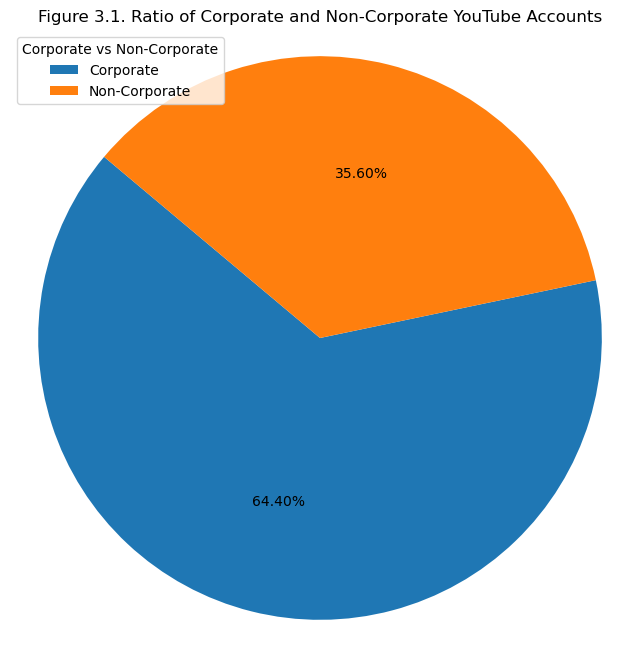

In [26]:
labels_df = pd.read_csv('Lab2_Labels.csv')

# Get the value counts for 'Independent' column
ind_corp_count = labels_df['Independent'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ind_corp_count, autopct='%1.2f%%',startangle=140)

# Add legend and title
legend_labels = ['Corporate', 'Non-Corporate']
plt.legend(legend_labels,
           title="Corporate vs Non-Corporate",
           loc="upper left")
plt.title("Figure 3.1. Ratio of Corporate and Non-Corporate YouTube Accounts")

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Figure 3.2. below further shows the breakdown of the number channels in each archetype captured in the top 250.

The top 3 most represented archetypes in the corpus are:
<ol>
    <li>Corporate / Non-Youtuber
    <li>Variety / General Enterntainment
    <li>Kids / Family
</ol>

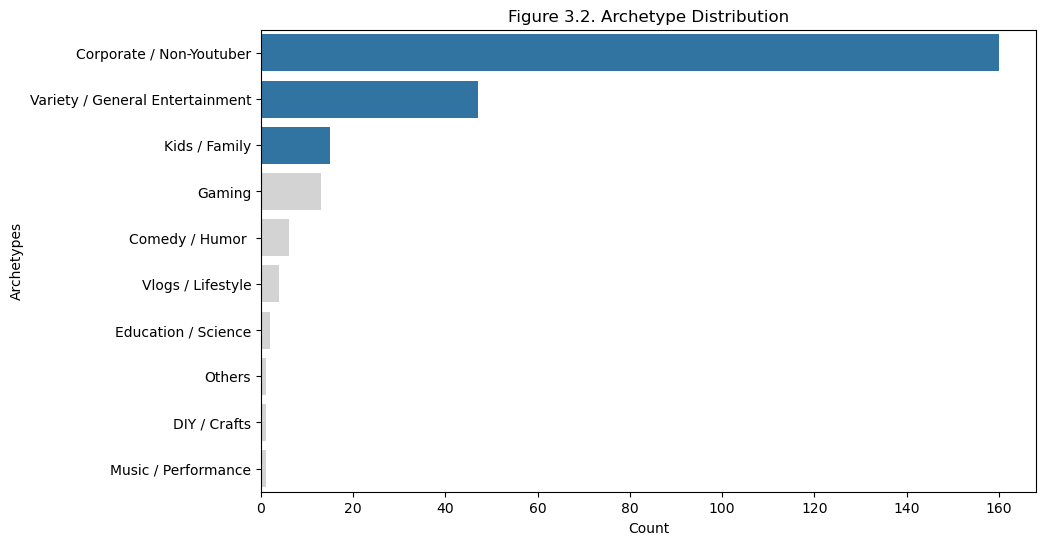

In [27]:
labels_df = pd.read_csv('Lab2_Labels.csv')
archetype_counts = (labels_df['Archetypes'].value_counts()
                    .sort_values(ascending=False))

# Create a horizontal bar plot using seaborn
top_3_colors = ['#1f77b4' if i < 3 else 'lightgray'
                for i in range(len(archetype_counts))]
plt.figure(figsize=(10, 6))
sns.barplot(x=archetype_counts.values, y=archetype_counts.index,
            orient='h', palette=top_3_colors)

# Add labels and titles
plt.xlabel('Count')
plt.ylabel('Archetypes')
plt.title('Figure 3.2. Archetype Distribution')

# Show the plot
plt.show()

Figure 3.4 below shows the distribution of channels per country, with most of the top channels from the United States and India. 

Apart from these two, a lot of the channels seem to have chosen to not reveal their home countries.

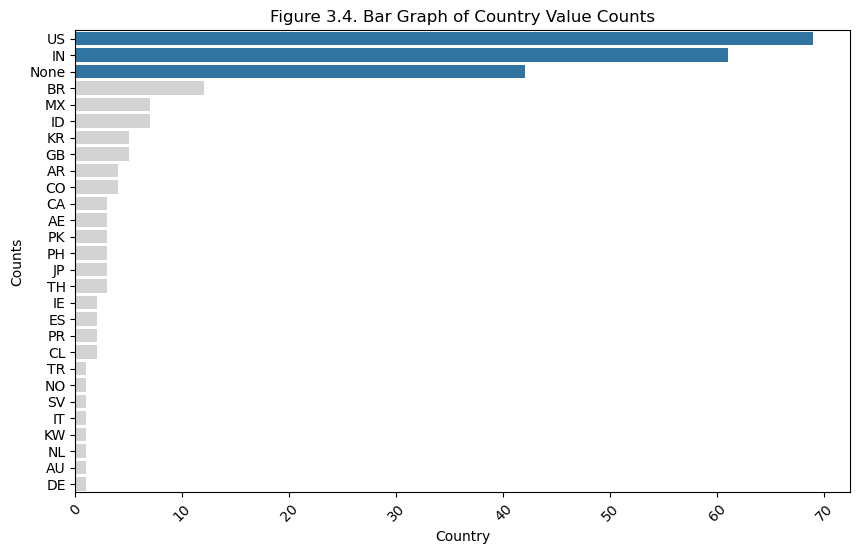

In [28]:
lab2_db = pd.read_csv('Lab2_DataBase.csv')
# Bar graph for the value counts of the "country" column
lab2_db['country'] = lab2_db['country'].fillna('None') 
country_counts = lab2_db['country'].value_counts()

top_3_colors = ['#1f77b4' if i < 3 else 'lightgray'
                for i in range(len(country_counts))]

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index,
            palette=top_3_colors)
plt.title('Figure 3.4. Bar Graph of Country Value Counts')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

Looking at the topics below (Figure 3.5), the vast majority of leading YouTube channels feature content centered around entertainment and its various forms.

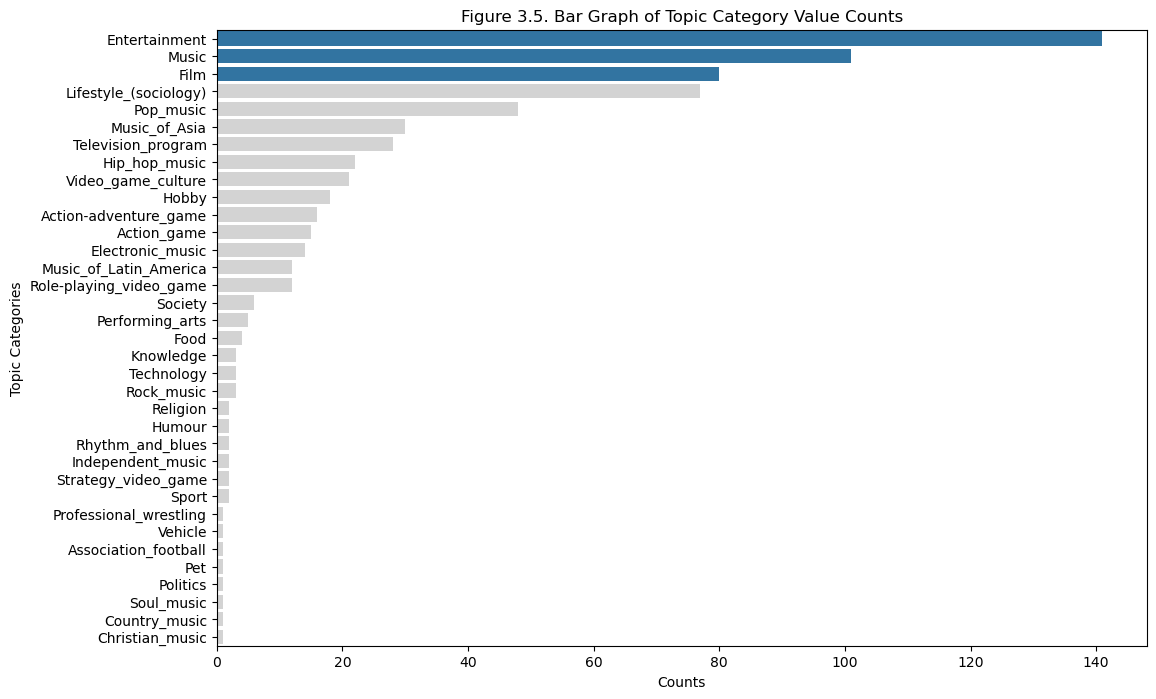

In [29]:
lab2_db_ = pd.read_csv('Lab2_DataBase.csv')

# Apply the function to the 'topic_categories' column
lab2_db_['topic_categories'] = (lab2_db_['topic_categories']
                                .apply(safe_eval_list))

# Flatten the list of lists into a single list
all_categories = sum(lab2_db_['topic_categories'], [])

# Extracting the meaningful part of the URL (after the last '/')
categories = [category.split('/')[-1] for category in all_categories]


# Counting the occurrences of each category
category_counts = pd.Series(categories).value_counts()

# # Plotting the bar graph
top_3_colors = ['#1f77b4' if i < 3 else 'lightgray'
                for i in range(len(category_counts))]
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index,
            palette=top_3_colors)
plt.title('Figure 3.5. Bar Graph of Topic Category Value Counts')
plt.xlabel('Counts')
plt.ylabel('Topic Categories')
plt.show()


## Results & Discussion
Using the IR system, corpus, and evaluation metrics, we can now input exemplars to see what type of Model Channels will be suggested to our Emerging Channel. 

This project will test the IR system with four different types of exemplars: 
<ol>
    <li>A Channel within the corpus, 
    <li>A Channel outside but whose archetype is well represented in the corpus, 
    <li>A Channel with limited representation, 
    <li>And a Channel whose archetype is not present in the corpus.
</ol>

### Billie Eilish 

Billie Eilish’s channel is part of the top 250 list used in the corpus. This channel contains her music videos and performances. Given the channel is likely managed by her team and producers, we classify this under the ‘Corporate / Non-Youtuber Account’ classifier. For all channels, we will be using k = 10.

Looking at the confusion matrix, we see that the model performs as expected with TP resulting in 10 and TN equals 0. FN is high given our selected number of k. While TN of 90 implies that around 90 channels are not similar to Billie Eilish. 

In [30]:
actual = 'Corporate / Non-Youtuber'
query = vectorize(raw_data.iloc[42:43].copy()) # Billie Eilish actual = 'Corporate / Non-Youtuber'

k = 10
objects = corpus_df
results = nearest_k(query, objects, k, lpnorm)
all_labels = labels_df['Archetypes']

confusion_m = get_confusion(actual, results, all_labels)
display(confusion_m)

precision1 = precision(confusion_m)
recall1 = recall(confusion_m)
f1_score = f_measure(precision1, recall1)
print(f'Precision: {precision1}')
print(f'Recall: {recall1}')
print(f'F1 Score: {f1_score}')

display(corpus_df.iloc[results])

,relevant,irrelevant
relevant,10,0
irrelevant,150,90


Precision: 1.0
Recall: 0.0625
F1 Score: 0.11764705882352941


,view_subscriber_ratio,country_AE,country_AR,country_AU,country_BR,country_CA,country_CL,country_CO,country_DE,country_ES,...,천상지희,천상지희더그레이스,택연,투에이엠,투피엠,트랙스,틱톡김프로,페이,피프틴앤드,혜림
title,,,,,,,,,,,,,,,,,,,,,
Billie Eilish,0.312116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ImagineDragons,0.602200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shawn Mendes,0.465006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ariana Grande,0.493880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Katy Perry,0.614952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Post Malone,0.618733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
David Guetta,0.747526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XXXTENTACION,0.285579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Marshmello,0.278671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To no surprise, Billie Eilish’s own channel ranks at the top of the 10 recommended channels for the exemplar. The following channels are fellow corporate accounts that work within the music industry. It is interesting to note that despite not being an archetype under ‘Music / Performance’, all channels fall under the same industry. This can be attributed to the similar keywords and labels that likely occur across these channels.  

0.7989126382251048


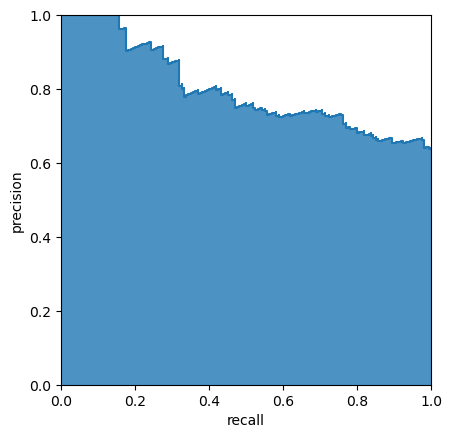

In [31]:
print(auc_pr(query, objects, lpnorm, actual, all_labels))
pr_curve(query, objects, lpnorm, actual, all_labels);

Looking at the PR Curve, we see a diminishing performance of the IR over higher k. Meaning, more recommendations will likely lead to more false positives.

### Yvonnie

Yvonnie is a medium sized channel that posts travel blogs, gaming videos, and other curated content. This broad range of content best fits in the ‘Variety / General Entertainment’ archetype.

Looking at the confusion matrix where Yvonnie is the exemplar, the recommender was able to provide 7 out 10 relevant channels that can help the channel grow. There are around 40 FNs that could have replaced the 3 FPs, while 200 TN or truly irrelevant channels were identified across the corpus.

In [32]:
actual = 'Variety / General Entertainment'
query = get_exemplar('UCgDvko7FcHndaS-QoLJw_PA') # Yvonnie

k = 10
objects = corpus_df
results = nearest_k(query, objects, k, lpnorm)
all_labels = labels_df['Archetypes']

confusion_m = get_confusion(actual, results, all_labels)
display(confusion_m)

precision1 = precision(confusion_m)
recall1 = recall(confusion_m)
f1_score = f_measure(precision1, recall1)
print(f'Precision: {precision1}')
print(f'Recall: {recall1}')
print(f'F1 Score: {f1_score}')

display(corpus_df.iloc[results])

,relevant,irrelevant
relevant,7,3
irrelevant,40,200


Precision: 0.7
Recall: 0.14893617021276595
F1 Score: 0.24561403508771928


,view_subscriber_ratio,country_AE,country_AR,country_AU,country_BR,country_CA,country_CL,country_CO,country_DE,country_ES,...,천상지희,천상지희더그레이스,택연,투에이엠,투피엠,트랙스,틱톡김프로,페이,피프틴앤드,혜림
title,,,,,,,,,,,,,,,,,,,,,
Beast Reacts,0.183707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MrBeast 2,0.179793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Topper Guild,0.701833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alan Chikin Chow,1.004238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MrBeast,0.186367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AuronPlay,0.150779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brent Rivera,0.270158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YouTube,0.094141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LeoNata Family,1.195211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The output of the IR lists down potential role models for Yvonnie. Many of this creators, as defined by their archetype, also offer a wide range of content. With this information, Yvonnie can look at these channels and identify patterns or practices that can help the channel achieve similar levels of subscribers.

0.5037650188483174


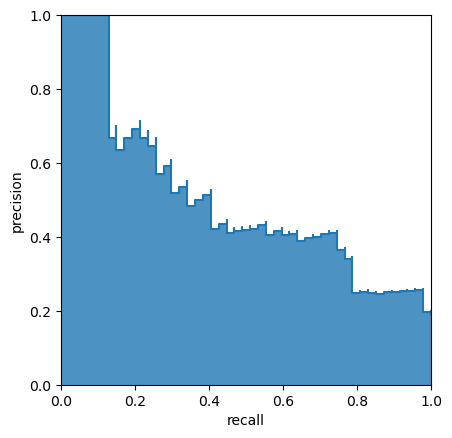

In [33]:
print(auc_pr(query, objects, lpnorm, actual, all_labels))
pr_curve(query, objects, lpnorm, actual, all_labels);

Observing the PR Curve, performance begins to drop significantly over higher levels of k. This can be attributed to the nature of being under the ‘Variety / General Entertainment’ archetype. Two channels under the same archetype can offer dramatically different content. Consequently, there is potential for channels in ‘Variety / General Entertainment’ matching with other archetypes given possible similarities in labels and keywords.  

### Doublelift

Doublelift is another medium sized YouTuber, focused on League of Legends (specific video game) content. Given this, the channel falls under ‘Gaming’, an archetype that has limited representation in the corpus. 

In [34]:
actual = 'Gaming'
query = get_exemplar('UCrPCP1oaOr0AEs2JdxzfOFA') #doublelift actual = 'Gaming'

k = 10
objects = corpus_df
results = nearest_k(query, objects, k, lpnorm)
all_labels = labels_df['Archetypes']

confusion_m = get_confusion(actual, results, all_labels)
display(confusion_m)

precision1 = precision(confusion_m)
recall1 = recall(confusion_m)
f1_score = f_measure(precision1, recall1)
print(f'Precision: {precision1}')
print(f'Recall: {recall1}')
print(f'F1 Score: {f1_score}')


,relevant,irrelevant
relevant,8,2
irrelevant,5,235


Precision: 0.8
Recall: 0.6153846153846154
F1 Score: 0.6956521739130435


Looking at the confusion matrix for Doublelift, out of the 10 recommended channels 8 were TPs while 2 were FPs. Considering the limitations of the corpus, 80 percent precision is a good score for the IR system even outperforming the previous exemplar.

In [35]:
display(corpus_df.iloc[results])

,view_subscriber_ratio,country_AE,country_AR,country_AU,country_BR,country_CA,country_CL,country_CO,country_DE,country_ES,...,천상지희,천상지희더그레이스,택연,투에이엠,투피엠,트랙스,틱톡김프로,페이,피프틴앤드,혜림
title,,,,,,,,,,,,,,,,,,,,,
DaFuq!?Boom!,0.410175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MrBeast Gaming,0.188125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VEGETTA777,0.488298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dream,0.102471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Markiplier,0.616638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VanossGaming,0.647654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Techno Gamerz,0.306532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
elrubiusOMG,0.195786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total Gaming,0.168897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Based on the listed Model Channels, Doublelift can observe strategies and techniques employed by the likes of MrBeast Gaming, Dream, and Markiplier. Accurately identifying which particular strategies are beyond the scope of this project, but it is safe to look at the Model Channel’s use of thumbnails, content (video games played), posting frequency, etc.

0.6543580440034645


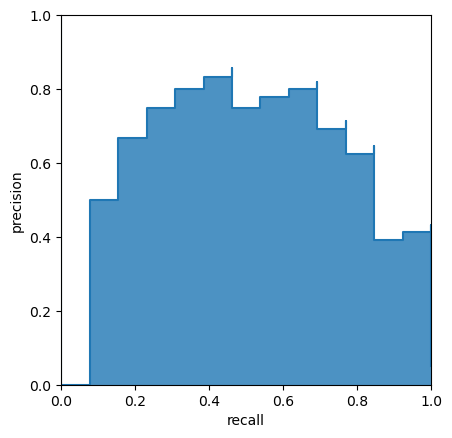

In [36]:
print(auc_pr(query, objects, lpnorm, actual, all_labels))
pr_curve(query, objects, lpnorm, actual, all_labels);

The PR Curve below shows varying levels of performance over varying levels of k with the highest levels at lower k. 

### Flavor Labs
FlavorLabs is a food-based channel with under 300,000 subscribers. Categorized under the Cooking / Food archetype, the channel yields a 0 TP score in the confusion matrix. This is expected given that there are no channels of this type in the corpus. 

In [37]:
actual = 'Cooking / Food'
query = get_exemplar('UCO5cuVeVi2WhSNFPL3szJ7A') # Flavorlabs

k = 10
objects = corpus_df
results = nearest_k(query, objects, k, lpnorm)
all_labels = labels_df['Archetypes']

confusion_m = get_confusion(actual, results, all_labels)
display(confusion_m)

precision1 = precision(confusion_m)
recall1 = recall(confusion_m)
f1_score = f_measure(precision1, recall1)
print(f'Precision: {precision1}')
print(f'Recall: {recall1}')
print(f'F1 Score: {f1_score}')


,relevant,irrelevant
relevant,0,10
irrelevant,0,240


Precision: 0.0
Recall: nan
F1 Score: nan


Moreover, none of the channels recommended by the IR system really resonates with what FLavorLabs is about. This exercise displays the limitation of this study, primarily due to the skewed distribution of the dataset towards specific archetypes.

In [38]:
display(corpus_df.iloc[results])

,view_subscriber_ratio,country_AE,country_AR,country_AU,country_BR,country_CA,country_CL,country_CO,country_DE,country_ES,...,천상지희,천상지희더그레이스,택연,투에이엠,투피엠,트랙스,틱톡김프로,페이,피프틴앤드,혜림
title,,,,,,,,,,,,,,,,,,,,,
DONA 도나,0.716737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MrBeast 2,0.179793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beast Reacts,0.183707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dude Perfect,0.297236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Boram Tube Vlog [보람튜브 브이로그],0.477692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shfa2 - شفا,0.647261,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZHC,0.120383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MrBeast,0.186367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YouTube,0.094141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


nan


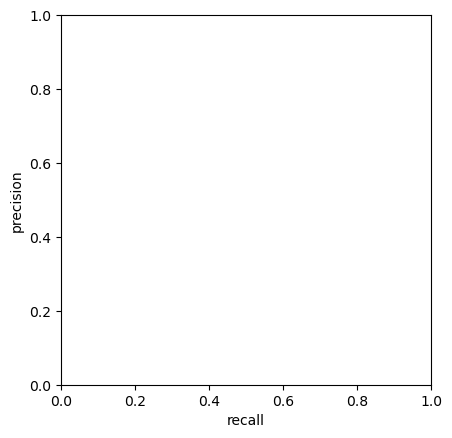

In [39]:
print(auc_pr(query, objects, lpnorm, actual, all_labels))
pr_curve(query, objects, lpnorm, actual, all_labels);

## Conclusion
The project successfully created a usesable IR system that would recommend relevant Model Channels to a given exemplar/Emerging Channel. Performance of the system varies depending on the archetype of the exemplar. This can be explained through the skewed distribution of the top 250 list, which served as the basis of the corpus. Nonetheless, the IR system performed well on archetypes found in the corpus, even with limited representation, providing mostly relevant channels that the exemplar can use to grow on the platform.  

## Recommendations

### Limitations
#### Limited Resources:  
Gated by limited API calls and time constraints, the corpus only consists of the Top 250 YouTube channels by subscriber count. Additionally, only 6 of the 14 archetypes are represented in the Top 250 because of the small sample size of the total number of channels on YouTube. This means that the study may not be able to capture the full range of channel types on YouTube. 
Moreover, YouTube API did not have the necessary calls to return a list of channels by their subscriber counts, thus an external source was used to gather the initial list of channels. 
#### Simple Archetyping:  
Channels are only assigned one archetype, even if they may theoretically be eligible for more to simplify the analysis. This means that the study may not accurately represent the complexity of some channels. 
#### Unweighted Variables:  
The researchers opted to not determine the weights of each feature. The decision was made because of the lack of a supporting theoretical framework for the algorithm. YouTube's algorithm is also not publicly known, so the researchers could not accurately determine which features are most important for predicting the success of YouTube channels. 

### Future Work/Continuation of Study
#### Larger Data Set
To directly address the limitations of the study, a larger dataset. One that is large enough to have all the archetypes adequately represented. It is also advisable to remove corporate accounts in the corpus, assuming the business objective is still to provide model channels for small independent channels. Moreover, it is possible to expand on the features used in the IR system. Variables under audience demographics, such as age, gender, nationality, comes to mind. 
#### Better Archetypes
Throughout the study the group observed that the original 14 archetypes did not capture all types of content in the corpus. This problem would be amplified if the new studies were to use larger datasets. Additionally, it is worth exploring removing ‘Variety / General Entertainment’ and converting it into more specific archetypes to avoid instances where it overlaps with other classifications. An alternative to this would be to allow multiple archetypes to be assigned to one channel and requiring only one matching archetype during Precision and Recall.
#### Assigning Weights
As observed in the project, some variables, namely the ratios and countries, did not have an apparent impact on the results of the IR. This can be addressed by manually increasing the values of said variables but the basis for these arbitrary increases requires mathematical explanation not covered by this project.
#### Channel Specific IR
After identifying similar Model Channels, it is possible to create a supplementary IR system that will find the most different variables between the Emerging Channels and Model Channels. The goal here becomes identifying metrics where the exemplar is lacking in comparison to the recommended channels. This can help the smaller creator pinpoint aspects of their YouTube strategy to improve on, building on the initial recommendations of our IR.


## References
<ol>
    <li>Google. YouTube Data API v3 - Google Developers. Retrieved from <a href="https://developers.google.com/youtube/v3">https://developers.google.com/youtube/v3</a href>
    <li>vidIQ. YouTube Stats - Top 500 YouTube Channels. Retrieved from <a href="https://vidiq.com/youtube-stats/top/500/">https://vidiq.com/youtube-stats/top/500/</a href>
    <li>OpenAI. (2022). ChatGPT (Version 3.5) [Computer software]. Retrieved from <a href="https://www.openai.com/">https://www.openai.com/</a href>
</ol>

## Acknowledgements
The entire thing would not have been possible without the careful guidance, understanding, and patience of the one Dr. Christian Alis.